# K-nearest neighbors algorithm

We will implement from scratch the KNN algorithm. 


<b> General idea:</b>

With a KNN classifier, the predicted class of a new point is the the most common class of its neighbours. 


<b> Steps of KNN classifier:</b>
    1. computing the distance of the point to other points of the dataset.
    2. according to distances, select the k closest neighbours
    3. the class of the new point is the neighbours's most frequent class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the dataset

Before implementing our classifier, lets load our data:

In [2]:
data=pd.read_csv("dataset.csv")


Lets take a look:

In [3]:
data.head(10)

,age,height,class
0,44,1.770826,Programmer
1,29,1.562530,Data Scientist
2,40,1.836191,Programmer
3,37,1.723574,Programmer
4,29,1.685144,Data Scientist
5,35,1.729868,Programmer
6,28,1.663725,Data Scientist
7,19,1.537866,Data Scientist
8,23,1.525927,Data Scientist
9,39,1.752162,Programmer


The dataset has <i>X</i> features corresponding to <i>age</i> and <i>height</i>. The dataset also has <i>Y</i> classes to be predicted: if it is either a <i>Programmer</i> or a <i>Data Scientist</i>.

- Inputs: X (age, heights)
- Output: Y (class = {Programmer, Data Scientist})

Lets divide our data into X and Y, since our algorithm will need the corresponding points and its classes.

In [4]:
X=data.iloc[:,:-1].values
Y=data["class"].values

In [5]:
X

array([[44.        ,  1.77082562],
       [29.        ,  1.56252986],
       [40.        ,  1.83619133],
       [37.        ,  1.72357381],
       [29.        ,  1.68514413],
       [35.        ,  1.72986829],
       [28.        ,  1.66372469],
       [19.        ,  1.53786587],
       [23.        ,  1.52592678],
       [39.        ,  1.7521619 ],
       [23.        ,  1.66864486],
       [26.        ,  1.89648941],
       [20.        ,  1.85652229],
       [27.        ,  1.59384768],
       [25.        ,  1.56635613],
       [21.        ,  1.6043559 ],
       [31.        ,  1.78388916],
       [24.        ,  1.62913107],
       [29.        ,  1.77958861],
       [37.        ,  1.87951635]])

In [6]:
Y

array(['Programmer', 'Data Scientist', 'Programmer', 'Programmer',
       'Data Scientist', 'Programmer', 'Data Scientist', 'Data Scientist',
       'Data Scientist', 'Programmer', 'Data Scientist', 'Programmer',
       'Programmer', 'Data Scientist', 'Data Scientist', 'Data Scientist',
       'Programmer', 'Data Scientist', 'Programmer', 'Programmer'],
      dtype=object)

Lets visualize:

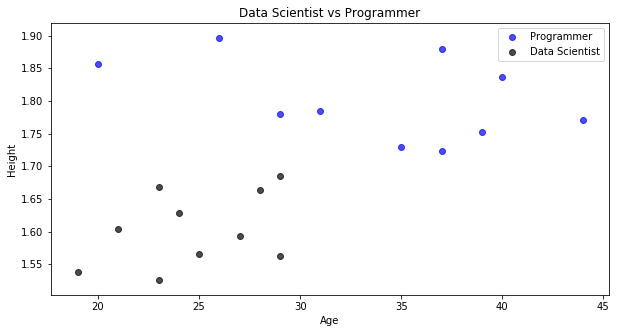

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
#assigns a color to each data point

categories = data["class"].unique()

def get_colour(data_class):
    return "black" if data_class == "Data Scientist" else "blue"

#iterates through the dataset plotting each data point and assigning it its corresponding color and label
for i in range(len(data)):
    ax.scatter(X[i,0], X[i,1], alpha=0.70, color =  get_colour(Y[i])  )
#adds title and axes labels
ax.set_title('Data Scientist vs Programmer')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.legend(categories)
plt.show()

# KNN Algorithm

Lets now implement the KNN algorithm that helps us predict new points based on the closest k neighbours.

### 1. Compute similarity

We first need to compute the similarity between new point and the example points of our dataset, so that we can then pick the closest k neighbours. 

In [8]:
def compute_similarity(examples, new_point):
    return np.sqrt(np.sum((examples-new_point)**2, axis=1))

### 2. Select the k closest neighbours

After having the distance of the new points to the other point(s) of the dataset, we can pick its closest k neighbours (the points that have higher similarity/less distance)

In [9]:
def get_kclosest_points(similarities, k):
    return np.argsort(similarities)[:k]

### 3. Predicted class is the neighbours's most frequent class

Having the k neighbours, we select the class that is the most frequent on the neighboord as the class of our new point. 

Example: For a new point, if the points that are similar to him (neighbours) are most of them Programmers, then the new point will be consider a Programmer.

In [10]:
from collections import Counter
def get_voted_class(neighbours, classes):
    neighbours_classes= np.array(classes[neighbours])
    return Counter(neighbours_classes).most_common(1)[0][0]

### Putting it all together:

We now just have to combine the previous steps in a single function, and voilà, we get our KNN classifier: 

In [11]:
def KNN(examples, classes, new_points, K=3):
    classes_predicted=[]
    for new_point in new_points:
        sim=compute_similarity(examples, new_point)
        neighbours=get_kclosest_points(sim,K)
        classes_predicted.append(get_voted_class(neighbours, classes))
    return classes_predicted

# Trying it out

Imagine we have new points, one of them from one class (Programmer) and the other from the other class (Data Scientist):

In [12]:
data_new_points=pd.read_csv("new_points.csv")
data_new_points

,age,height,class
0,48,1.820126,Programmer
1,19,1.602530,Data Scientist


In [13]:
new_points=data_new_points.iloc[:,:-1].values
correct_classes = data_new_points.loc[:,"class"].values

Lets visualize the new points:

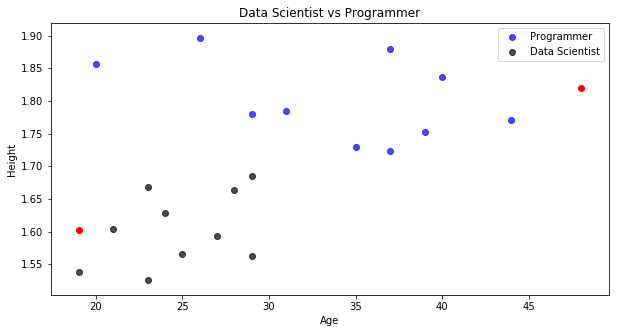

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
#assigns a color to each data point

categories = data["class"].unique()

def get_colour(data_class):
    return "black" if data_class == "Data Scientist" else "blue"

#iterates through the dataset plotting each data point and assigning it its corresponding color and label
for i in range(len(data)):
    ax.scatter(X[i,0], X[i,1], alpha=0.70, color =  get_colour(Y[i])  )
ax.scatter(new_points[:,0], new_points[:,1], color = "red")
#adds title and axes labels
ax.set_title('Data Scientist vs Programmer')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.legend(categories)
plt.show()

Looking to the neighbours of the point on the top right, a KNN algorithm should consider it a Programmer. And the point on the bottom left should be considered a Data Scientist.

Lets see if our KNN get it right, using 3 closest neighbours:

In [17]:
predictions=KNN(X, Y, new_points, K=3)
predictions

['Programmer', 'Data Scientist']

Nice, it got it right!! 

In [26]:
predictions == correct_classes

array([ True,  True])

(PS- Note the data used was just a simply example. In real datasets, new points are not that easy to predict)